In [2]:
%load_ext autoreload
%autoreload 2

import fd_imputer
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import itertools
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set up all paths and labels needed in this notebook

In [3]:
DATA_PATH = 'MLFD_fd_detection/backend/WEB-INF/classes/inputData/adult.csv'
SPLITS_PATH = 'MLFD_fd_detection/data/'
METANOME_DATA_PATH = 'MLFD_fd_detection/backend/WEB-INF/classes/inputData/'
FD_PATH = 'MLFD_fd_detection/results/HyFD-1.2-SNAPSHOT.jar2019-05-07T082200_fds'
DATA_TITLE = 'adult'

In [4]:
df_train = pd.read_csv(SPLITS_PATH+'test/'+DATA_TITLE+'_test.csv', header=None)
df_test = pd.read_csv(SPLITS_PATH+'train/'+DATA_TITLE+'_train.csv', header=None)
fds = fd_imputer.read_fds(FD_PATH)
impute_column = str(9)
df_test = df_test.replace('noValueSetHere123156456', np.nan)
df_train = df_train.replace('noValueSetHere123156456', np.nan)

## FD_Imputer

### Getting metrics for all FDs in adult.csv

In [5]:
from sklearn import metrics 

In [6]:
fd_imputer_results = {}
for rhs in fds:
    results = []
    for lhs in fds[rhs]:
        print(rhs, lhs)
        fd = {rhs: lhs}
        df_fd_imputed = fd_imputer.fd_imputer(df_test, df_train, fd)
        
        # make sure that value for missing data is of same type as row to be imputed
        # to avoid mix of labels with scikit.metrics
        if isinstance(df_fd_imputed.loc[0, rhs], str):
            df_fd_imputed = df_fd_imputed.fillna('no value')
        else:
            df_fd_imputed = df_fd_imputed.fillna(99999999)
        y_pred = df_fd_imputed.loc[:, str(rhs)+'_imputed']
        y_true = df_fd_imputed.iloc[:, rhs]
        result = {
            'lhs': lhs,
            'precision': metrics.precision_score(y_true, y_pred, average='weighted'),
            'recall': metrics.recall_score(y_true, y_pred, average='weighted'),
            'f1': metrics.f1_score(y_true, y_pred, average='weighted')
        }
        results.append(result)
    fd_imputer_results[rhs] = results

3 [0]
11 [0]


/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/philipp/code/python-envs/mlfd/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


13 [0]
12 [0]
12 [13, 1, 2, 3, 4, 7]
12 [13, 1, 3, 4, 6, 7]
12 [13, 1, 3, 4, 7, 8]
12 [13, 1, 2, 3, 5, 7]
12 [13, 1, 3, 5, 6, 7]
12 [13, 1, 3, 5, 7, 8]
1 [0]
14 [0]
4 [0]
4 [5]
5 [0]
5 [4]
7 [0]
2 [0]
6 [0]
6 [11, 13, 1, 3, 7, 8]
6 [13, 1, 3, 4, 7, 8]
6 [13, 1, 3, 5, 7, 8]
8 [0]
9 [0]
9 [11, 12, 13, 3, 7, 8]
9 [12, 13, 15, 3, 4, 6, 8]
9 [12, 13, 15, 3, 5, 6, 8]
9 [13, 1, 3, 4]
9 [13, 1, 3, 5]
9 [13, 1, 2, 3, 7]
9 [13, 14, 3, 4, 7]
9 [13, 14, 3, 4, 6, 8]
9 [13, 14, 3, 5, 7]
9 [13, 14, 3, 5, 6, 8]
9 [13, 14, 2, 3, 7]
9 [13, 14, 3, 6, 7]
9 [13, 14, 3, 7, 8]
9 [10, 13, 14, 15, 3, 7]
9 [13, 15, 2, 3, 4, 6, 8]
9 [13, 15, 2, 3, 5, 6, 8]
9 [12, 14, 2, 3, 4, 6, 8]
9 [12, 14, 2, 3, 5, 6, 8]
9 [12, 15, 2, 3, 4, 6, 8]
9 [12, 15, 2, 3, 5, 6, 8]
9 [14, 1, 3, 4]
9 [14, 1, 3, 5]
9 [14, 1, 2, 3, 7]
9 [14, 1, 2, 3, 6]
9 [1, 3, 4, 6]
9 [1, 3, 4, 8]
9 [15, 1, 3, 4]
9 [1, 3, 5, 6]
9 [1, 3, 5, 8]
9 [15, 1, 3, 5]
9 [1, 3, 6, 7]
9 [1, 3, 7, 8]
9 [15, 1, 3, 7]
9 [10, 14, 3, 4, 7]
9 [14, 15, 2, 3, 4, 6, 8]
9 [1

In [80]:
precision = [e['precision'] for rhs in fd_imputer_results 
 for e in fd_imputer_results[rhs]]
recall = [e['recall'] for rhs in fd_imputer_results 
 for e in fd_imputer_results[rhs]]
f1 = [e['f1'] for rhs in fd_imputer_results 
 for e in fd_imputer_results[rhs]]
rhs_color = [rhs for rhs in fd_imputer_results 
           for e in fd_imputer_results[rhs]]

area = [x*4000 for x in f1]
colormap = plt.cm.get_cmap('RdYlBu')

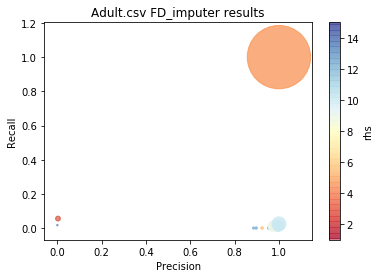

In [86]:
fig, ax = plt.subplots()
sc = plt.scatter(precision, recall, cmap=colormap,
            c=rhs_color, s=area, alpha=0.5)
plt.colorbar(sc, label='rhs')
ax.set(title='Adult.csv FD_imputer results',
      xlabel = 'Precision',
      ylabel = 'Recall')
fig.savefig('fd_imputer_performance.png', transparent=False,
           dpi=320, bbox_inches='tight')

### Manual fd detection using fd_imputer.fd_imputer

In [11]:
#fd = {9: [3, 4, 7, 8]}
fd = {4: [5]} # this fd creates a memory error if no drop_duplicates
rhs = list(fd)[0]
lhs = fd[rhs]
relevant_cols = lhs.copy()
relevant_cols.append(rhs)

In [49]:
df_fd_imputed = fd_imputer.fd_imputer(df_test, df_train, fd)
df_fd_imputed = df_fd_imputed.fillna('no value')

In [22]:
y_pred = df_fd_imputed.loc[:, '9_imputed']
y_true = df_fd_imputed.iloc[:, 9]
print(metrics.precision_score(y_true, y_pred, average='weighted'))
print(metrics.recall_score(y_true, y_pred, average='weighted'))
print(metrics.f1_score(y_true, y_pred, average='weighted'))

KeyError: '9_imputed'

## 1. How to split the dataset

In [ ]:
df = pd.read_csv(DATA_PATH, sep=';', header=None)
fd_imputer.save_df_split(DATA_TITLE, df, SPLITS_PATH, METANOME_DATA_PATH, [0.8, 0.2])

## 2. How to use the ML-imputer

Impute test-set

In [ ]:
df_imputed = fd_imputer.ml_imputer(df_train, df_test, impute_column)

In [ ]:
df_imputed.head()

In [ ]:
f1 = f1_score(df_imputed[impute_column], df_imputed[impute_column+'_imputed'].astype(int), average='weighted')
print(f1)

The ML model's mean relative error is roughly 0.2%

In [ ]:
average_rel_error = ((df_imputed[impute_column] - df_imputed[impute_column+'_imputed'])
 / df_imputed[impute_column]).mean()
print(average_rel_error)